#  Moderne Portfoliotheorie

Wir nehmen an, wir wollen zwei Aktien erwerben, deren (unabhängige) Kursgewinne wir mit den normalverteilten Zufallsvariablen

$$ X_1 \sim N(\mu_1 = \mu, \sigma_1^2 = 1) \quad \text{und} \quad X_2 \sim N(\mu_2 = \mu, \sigma_2^2 = 2) $$

modellieren. Beide Aktien weisen also den gleichen erwarteten Gewinn $\mu$ aber ein unterschiedliches Anlagerisiko über die Varianz aus.

Weil das Kursrisiko minimiert werden soll, stellt sich die Frage, in welchem Verhältnis die Aktien erworben werden sollen?

Es soll ein Anteil von $0 \leq \alpha \leq 1$ von Aktie 1 und ein Anteil von $1-\alpha$ von Aktie 2 erworben werden.

Der Gewinn des Depots kann also mit Hilfe der normalverteilten Zufallsvariablen

$$ Y = \alpha X_1 + (1-\alpha) X_2 $$

modelliert werden.

#### Erwartungswert
Für den Erwartungswert von $Y$ erhält man
$$ E(Y) = E(\alpha X_1 + (1-\alpha) X_2) = E(\alpha X_1) + E((1-\alpha) X_2) \\ = \alpha E(X_1) + (1-\alpha)E(X_2) = \alpha \mu + (1-\alpha) \mu = \mu $$

#### Varianz
Für die Varianz von $Y$ erhält man
$$ \operatorname{Var}(Y) = \operatorname{Var}(\alpha X_1 + (1-\alpha) X_2) = \alpha^2 \sigma_1^2 + (1-\alpha)^2 \sigma_2^2 = \alpha^2 + 2 (1-\alpha)^2 $$

Gesucht ist also das Minimum von $\operatorname{Var}(Y)$ in Abhängigkeit von $\alpha$.

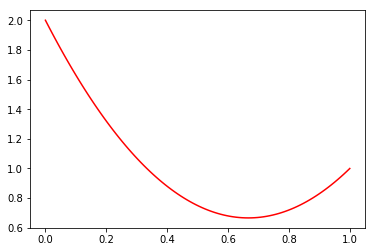

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

alpha = np.linspace(0,1,100)
plt.plot(alpha, alpha**2 + 2*(1-alpha)**2, 'r-');

### Analytische Lösung

Wir formen um

$$ \operatorname{Var}(Y) = 3 \alpha^2 - 4\alpha + 2 = 3(\alpha - 2/3)^2 + 2/3 $$

Dies ist die Scheitelpunktsform einer Parabel, die ihr absolutes Minumum bei $\alpha = 2/3 $ annimmt.

Die Varianz von $Y$ ist damit ebenfalls 2/3.

### Diskussion

Überraschenderweise ist es also besser 2/3 des Anlagekapitals in die erste Aktie und den Rest in die zweite Aktie zu investieren.

Die Lösung setzt voraus, dass die Aktien unabhängig voneinander Gewinne abwerfen. Man kann zeigen, dass das Risiko noch weiter minimiert werden kann, wenn die Kurse negativ korreliert sind.

*(Harry M. Markowitz bekam für seine Arbeiten zur Portfoliotheorie 1990 den Nobelpreis für Wirtschaftswissenschaften.)*

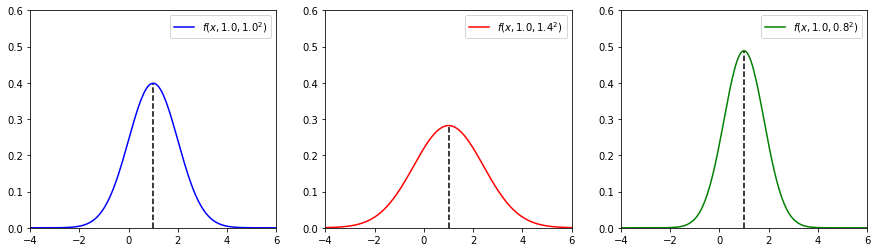

In [2]:
from matplotlib.mlab import normpdf

mus = [1,1,1]
sigmas = np.sqrt(np.array([1,2,2/3]))
colors = ['blue','red','green']
fig, axes = plt.subplots(1, len(mus), figsize=(15,4))

for mu, sigma, color, ax in zip(mus, sigmas, colors, axes):
    x = np.linspace(-4,6,200)
    y = normpdf(x,mu,sigma)
    ax.plot(x,y,color, label=u'$f(x,%.01f,%.01f^2$)'%(mu,sigma))
    ax.set_xlim((-4,6))
    ax.set_ylim((0,0.6))
    ax.legend()
    ax.vlines(mu,0,normpdf(mu,mu,sigma), linestyles='dashed')
